<a href="https://colab.research.google.com/github/arnavchopra1864/DataHacks2023/blob/main/DataHacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataHack: Detecting Fake Reviews

This Colab notebook demonstrates how to load the dataset, perform basic exploratory analysis, and use a sentiment analysis model on the review data.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "Amazon_reviews_plus_LLM.csv"
data = pd.read_csv(url)


## Exploratory Data Analysis

Let's begin by exploring the dataset to understand its structure, content, and distribution of values.


In [ ]:
# Display first few rows of the dataset
data.head()


,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
0,198558,025f77a0-4449-496b-bce3-f17e1d98ba35,018f0ae8-8b60-4ad1-a80c-6e05ed7e2fd9,Kyle K,"[0, 0]",disappointed quality nails split easily tried ...,2.0,poor quality,1.358035,"01 13, 2013",True,0,0,0,0.0,113,False
1,201731,ca5f4fa9-38ee-48ce-9dcb-49518f9835e8,bdb72279-6d00-46b9-ae1f-37f3b26d1172,Beverly,"[0, 0]",hairspray best 's lightweight smells really good,4.0,lightweight smells great,1.396224,"03 31, 2014",True,0,0,0,0.0,74,False
2,178569,f5e17397-c34b-45d2-8caa-e83ad5385a7b,856abd07-c2ad-4616-a88a-3d9bee7becb2,Mary S.,"[0, 0]",get ugly white pus pimples chin least month us...,5.0,must magic,1.374710,"07 25, 2013",False,0,0,0,0.0,976,False
3,56421,1e70ea07-6637-486f-bff8-be905f0fecfe,2d531626-7ce5-43e2-9857-cfd31f9d73e4,Micaela Reynolds,"[1, 1]",oh gosh oh gosh start hate moisturizers n't ca...,5.0,buy stuff,1.378771,"09 10, 2013",False,2,1,1,1.0,655,False
4,85063,a379a65e-84b4-4b00-aa05-6667a24492d8,f56b5555-ecb1-45e9-83e9-901ebeb99568,roblimar,"[1, 2]",'ve used times 's really helpful fill brows cr...,4.0,neat tool,1.361318,"02 20, 2013",False,2,1,2,0.5,428,False


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   reviewerID      10000 non-null  object 
 2   asin            10000 non-null  object 
 3   reviewerName    9961 non-null   object 
 4   helpful         10000 non-null  object 
 5   reviewText      10000 non-null  object 
 6   overall         10000 non-null  float64
 7   summary         9978 non-null   object 
 8   unixReviewTime  10000 non-null  float64
 9   reviewTime      10000 non-null  object 
 10  llm             10000 non-null  bool   
 11  fake            10000 non-null  int64  
 12  wasHelpful      10000 non-null  int64  
 13  totalReviews    10000 non-null  int64  
 14  helpRatio       10000 non-null  float64
 15  length          10000 non-null  int64  
 16  fakeBoolean     10000 non-null  bool   
dtypes: bool(2), float64(3), int64(5)

In [ ]:
# Summary statistics
data.describe()


,Unnamed: 0,overall,unixReviewTime,fake,wasHelpful,totalReviews,helpRatio,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,150552.431700,4.221370,1.364726,0.400000,0.910100,1.156900,0.153688,356.580000
std,64655.452019,1.040169,0.037634,0.777213,6.386274,7.270266,0.335967,383.595374
min,1.000000,0.000000,1.087690,0.000000,0.000000,0.000000,0.000000,4.000000
25%,99920.250000,4.000000,1.354838,0.000000,0.000000,0.000000,0.000000,167.750000
50%,198498.500000,4.500000,1.372118,0.000000,0.000000,0.000000,0.000000,244.000000
75%,201255.250000,5.000000,1.390867,0.000000,0.000000,0.000000,0.000000,377.000000
max,204054.000000,5.000000,1.406074,2.000000,252.000000,260.000000,1.000000,8043.000000


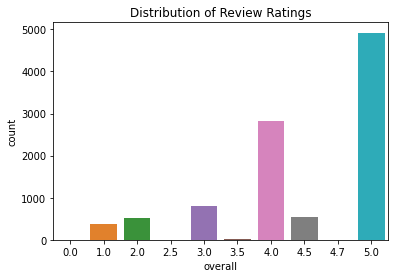

      Unnamed: 0                            reviewerID  \
6785      198886  621b15f0-412e-47f3-a88d-b0c82b8e4867   

                                      asin reviewerName helpful  \
6785  a5de34ea-9bde-4b2f-8fdc-bcb2244e3da8      John L.  [0, 0]   

                                             reviewText  overall  \
6785  product great takes make ease leaves skin feel...      4.7   

                            summary  unixReviewTime  reviewTime   llm  fake  \
6785  leaves skin feeling refreshed        1.362269  03 3, 2013  True     0   

      wasHelpful  totalReviews  helpRatio  length  fakeBoolean  
6785           0             0        0.0     150        False  


In [ ]:
# Distribution of review ratings
sns.countplot(x="overall", data=data)
plt.title("Distribution of Review Ratings")
plt.show()
print(data[data.overall == 4.7])


## Sentiment Analysis

We will use the Hugging Face Transformers library to load a pre-trained sentiment analysis model and apply it to our reviews.


In [ ]:
# Install Hugging Face Transformers library
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.7 MB/s eta 0:00:00


In [ ]:
# Import required libraries
from transformers import pipeline

# Load sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Let's apply the sentiment analysis model to a few example reviews from the dataset.


In [ ]:
# Function to calculate sentiment for a given review
def analyze_sentiment(review):
    result = sentiment_model(review)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to a few example reviews
example_reviews = data["reviewText"].head(5)
sentiments = [analyze_sentiment(review) for review in example_reviews]

for i, (review, sentiment) in enumerate(zip(example_reviews, sentiments)):
    print(f"Review {i + 1}:")
    print(f"Text: {review}")
    print(f"Sentiment: {sentiment[0]}, Score: {sentiment[1]:.2f}")
    print()


Review 1:
Text: disappointed quality nails split easily tried shape right size
Sentiment: NEGATIVE, Score: 0.99

Review 2:
Text: hairspray best 's lightweight smells really good
Sentiment: POSITIVE, Score: 1.00

Review 3:
Text: get ugly white pus pimples chin least month usually waking morning horrible ugly white thing chin happy get try let 's face old solution covering things pop 's good thing come right back.i love `` dots '' clear come varying sizes one sheet nobody ever noticed small one jawline every night nights removed white stuff inside pimple within days pimple gone scarring n't look ugly white pus pimple days `` dot '' covered well wear makeup mine n't think ever would.as anyone complains dot glossy visible would rather people looking glossy dot face white pus pimple 'll take glossy dot day week happy
Sentiment: NEGATIVE, Score: 0.99

Review 4:
Text: oh gosh oh gosh start hate moisturizers n't care much say `` heal even driest skin '' work used coconut oil face thinking mayb

## Some food for thought
The original, non-LLM generated reviews are "from the wild." Can you really trust these reviews to be all human-generated and natural? Fake reviews have been around for a while, after all. Perhaps you could filter by helpfulness ratio (helpful votes divided by total votes) or by some other metric to further refine your dataset of real reviews.

In [ ]:
# find products which have entirely LLM reviews
s = set()
counter = 0
for i in data["asin"].unique():
  flag = True
  for j in data[data["asin"] == i]["llm"]:
    if j == False:
      flag = False
      break
    counter += 1
  if flag:
    s.add(i)

In [ ]:
dfLLM = data[data["llm"]==True]
dfLLM.groupby("asin").head(10)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
0,198558,025f77a0-4449-496b-bce3-f17e1d98ba35,018f0ae8-8b60-4ad1-a80c-6e05ed7e2fd9,Kyle K,"[0, 0]",disappointed quality nails split easily tried ...,2.0,poor quality,1.358035,"01 13, 2013",True,0,0,0,0.0,113,False
1,201731,ca5f4fa9-38ee-48ce-9dcb-49518f9835e8,bdb72279-6d00-46b9-ae1f-37f3b26d1172,Beverly,"[0, 0]",hairspray best 's lightweight smells really good,4.0,lightweight smells great,1.396224,"03 31, 2014",True,0,0,0,0.0,74,False
5,200904,27af7ea5-7715-4fc6-95f4-4dae510ef6ee,f40b8149-f6bd-495c-a590-1a067bf5c99a,Steve,"[0, 0]",hesitant buy wipes price 'm glad excellent job...,4.0,great buy,1.368317,"05 12, 2013",True,0,0,0,0.0,222,False
7,200057,b177656a-35f4-4f4e-8806-78312bc511ee,ac83f6a0-33ed-4dcd-a415-e4e921580368,Breezy,"[0, 0]",review text awesome comb fine hair comb works ...,5.0,great fine hair,1.317082,"09 27, 2011",True,0,0,0,0.0,163,False
8,203272,731afc27-8d74-4828-9820-18ebc183009f,e6cb1f29-3a7b-4533-8e5f-b5bd3d0348ea,Xena,"[0, 0]",'ve using cologne months say 's pretty good sc...,4.0,great scent value,1.400717,"05 22, 2014",True,0,0,0,0.0,369,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,203693,4dd59a04-eaad-49ec-83ba-77c342a4390b,34603118-1e60-4013-9e2c-f3380936a354,J.P.,"[0, 0]",bought special occasion perfect colour beautif...,4.0,perfect special occasions,1.403741,"06 26, 2014",True,0,0,0,0.0,115,False
9988,200360,c0e4e3b2-490a-4bda-9e25-96eabd495a90,e538ced3-9b1b-4ce2-92e2-a979247304fe,NailLover,"[0, 0]",cnd shellac base coat must-have shellac system...,4.5,must-have product,1.289347,"11 10, 2010",True,0,0,0,0.0,207,False
9990,200230,cd028f11-8a9e-4f72-a3f1-37f0c3395f1f,f495bfae-b5d7-4e49-a416-a0a9dd88f93e,Lauren D.,"[0, 0]",using yonka years love smells great leaves ski...,5.0,worth price,1.356566,"12 27, 2012",True,0,0,0,0.0,242,False
9994,203333,7a3464d9-0b47-4d82-99cc-bc21441d6991,e9f1b3e7-00e4-46af-8b46-ef767a12d961,"Gwen ""Gwen""","[0, 0]",product miracle dealing sun spots blemishes ye...,4.0,absolutely amazing,1.369526,"05 26, 2013",True,0,0,0,0.0,409,False


In [ ]:
print(len(s))
print(s)

658
{'628cb39c-2881-481b-9ffc-225e47fbed78', 'e4b74b1a-f80a-4482-8b63-9306fa1e2a85', '2f447053-2040-473b-ae3e-150c8080dad8', '616a7cb5-c240-4a0c-8674-69f4e67c3df0', '04bb6deb-3677-493e-a42b-e2e6baa4248a', '9e30f4a4-a307-4bee-9a88-08139baf23cd', '2f85acdd-8cfd-48d2-88df-eaaa17320910', '702481e6-bf0a-49b4-9df3-d8b52ba36b5f', '52cc981b-6c4a-482b-972e-a67597048724', '3b315608-76e6-4d05-8d0e-c211b242f9ee', '3cd40865-fe75-4c1c-9ea4-693e4b63783d', 'd754d491-3b9d-4c4d-b876-47a3706efa86', 'df5c0089-46af-485f-a90d-cb3ca59a8378', '07bb6fc0-ba2c-4864-95cf-aa8850bc45e2', '7ea9d806-4298-4164-9666-01ff2ce87359', '7f0bcbbd-8379-40d7-8911-041ced83976a', '4c2a2d21-4852-4797-97c1-e1934f32e386', '16d67272-556a-4d55-a860-b694450bf999', '44cf2987-d09c-4a6a-98bf-6583fa4cb0af', 'ce5f31a1-ea03-4bf3-83fa-c8584739c41b', '96dd954c-5b45-45b0-9d88-5bb859040206', 'c26240f5-259f-4f1f-825e-8437347fb337', '6dcaee8b-2c8b-4500-8aaf-983a6b8c0588', '50c7ce3d-e282-43df-a0d0-9ae1a5c8ec20', '6d3a1d7d-c71e-4fc0-ab51-2309dfa800

In [ ]:
print(len(data["asin"].unique()))

3997


In [ ]:
dataNotHelpful = data[data["helpful"]=="[0, 0]"]
d2 = dataNotHelpful[dataNotHelpful["llm"]==True]
print(len(d2))

5000


In [ ]:
def is_fake(x): 
    a = x["helpful"][1:-1].split(", ")
    # 0 means not enough data: 0 helpful votes
    if(int(a[1]) == 0):
      return 0
    # 1 means fake, 2 means real
    ratio = int(a[0])/int(a[1])
    return 1 if ratio < 0.3 else (2 if ratio > 0.7 else 0)

data["fake"] = data.apply(lambda x: is_fake(x), axis=1)
data["wasHelpful"] = data.apply(lambda x: int(x["helpful"][1:-1].split(", ")[0]), axis=1)
data["totalReviews"] = data.apply(lambda x: int(x["helpful"][1:-1].split(", ")[1]), axis=1)
data["helpRatio"] = data.apply(lambda x: 0 if x["totalReviews"] == 0 else x["wasHelpful"]/x["totalReviews"], axis=1)
data.head(10)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
0,198558,025f77a0-4449-496b-bce3-f17e1d98ba35,018f0ae8-8b60-4ad1-a80c-6e05ed7e2fd9,Kyle K,"[0, 0]",disappointed quality nails split easily tried ...,2.0,poor quality,1.358035,"01 13, 2013",True,0,0,0,0.0,113,False
1,201731,ca5f4fa9-38ee-48ce-9dcb-49518f9835e8,bdb72279-6d00-46b9-ae1f-37f3b26d1172,Beverly,"[0, 0]",hairspray best 's lightweight smells really good,4.0,lightweight smells great,1.396224,"03 31, 2014",True,0,0,0,0.0,74,False
2,178569,f5e17397-c34b-45d2-8caa-e83ad5385a7b,856abd07-c2ad-4616-a88a-3d9bee7becb2,Mary S.,"[0, 0]",get ugly white pus pimples chin least month us...,5.0,must magic,1.374710,"07 25, 2013",False,0,0,0,0.0,976,False
3,56421,1e70ea07-6637-486f-bff8-be905f0fecfe,2d531626-7ce5-43e2-9857-cfd31f9d73e4,Micaela Reynolds,"[1, 1]",oh gosh oh gosh start hate moisturizers n't ca...,5.0,buy stuff,1.378771,"09 10, 2013",False,2,1,1,1.0,655,False
4,85063,a379a65e-84b4-4b00-aa05-6667a24492d8,f56b5555-ecb1-45e9-83e9-901ebeb99568,roblimar,"[1, 2]",'ve used times 's really helpful fill brows cr...,4.0,neat tool,1.361318,"02 20, 2013",False,0,1,2,0.5,428,False
5,200904,27af7ea5-7715-4fc6-95f4-4dae510ef6ee,f40b8149-f6bd-495c-a590-1a067bf5c99a,Steve,"[0, 0]",hesitant buy wipes price 'm glad excellent job...,4.0,great buy,1.368317,"05 12, 2013",True,0,0,0,0.0,222,False
6,99944,a057d8ff-d475-4b5d-8004-4bc3a7141375,125c3c3b-f80a-413f-a2af-81b49e865a26,"L. Stark ""Starky915""","[0, 0]",dryer works pretty well maybe expectations hig...,3.0,work pretty well maybe expectations high,1.388707,"01 3, 2014",False,0,0,0,0.0,1249,False
7,200057,b177656a-35f4-4f4e-8806-78312bc511ee,ac83f6a0-33ed-4dcd-a415-e4e921580368,Breezy,"[0, 0]",review text awesome comb fine hair comb works ...,5.0,great fine hair,1.317082,"09 27, 2011",True,0,0,0,0.0,163,False
8,203272,731afc27-8d74-4828-9820-18ebc183009f,e6cb1f29-3a7b-4533-8e5f-b5bd3d0348ea,Xena,"[0, 0]",'ve using cologne months say 's pretty good sc...,4.0,great scent value,1.400717,"05 22, 2014",True,0,0,0,0.0,369,False
9,91059,b952faec-26c8-4807-b082-af05a47dc04e,12d3164e-895c-4b6b-94cc-39ead61fd442,GTR,"[1, 1]",great product price hold well.a must hair stas...,5.0,good hold,1.398902,"05 1, 2014",False,2,1,1,1.0,121,False


In [ ]:
print(len(data[data["fake"]==1]))

360


In [ ]:
data = data.fillna('')
dfDefault = data[data["reviewerName"].str.contains("Amazon Customer")]
print(len(dfDefault))
dfDefault["llm"].value_counts()

87


False    83
True      4
Name: llm, dtype: int64

In [ ]:
dfLLM = data.query("llm == True")
print(len(dfLLM))
dfLLM.head(1)
dfLLM['overall'].value_counts()
dfHUM = data.query("llm == False")
print(len(dfHUM))
dfHUM.head(1)
dfHUM['overall'].value_counts()

5000
5000


5.0    2918
4.0     968
3.0     553
2.0     285
1.0     276
Name: overall, dtype: int64

#START PRELIMINARY MODEL WITH NO TEXT

In [ ]:
data2 = dfLLM.sample(n=5000)
data2 = pd.concat([data2, dfHUM.sample(n=5000)], axis=0)
data2 = data2.sample(frac=1)
data2["unixReviewTime"] = data2["unixReviewTime"]/(10**9)
print(len(data2))

data2.head(10)

10000


,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
6001,201365,4dababae-1690-4b3a-94b8-0dc06932f7e8,24783dea-1634-4508-8407-5ff58f3bc997,KikiK,"[0, 0]",brush absolutely amazing super curly thick hai...,5.0,curly hair miracle brush,1.317082e-09,"09 27, 2011",True,0,0,0,0.0,215,False
4691,202480,f1b3f8d1-1f3e-4954-9f6e-867d5d7c8a11,d3848f70-4d11-4c4c-abe4-9b18d8f71d07,PaintItPretty,"[0, 0]",great product works really well bought thin se...,4.5,low cost great results,1.316218e-09,"09 17, 2011",True,0,0,0,0.0,314,False
4382,202807,1727604d-af0c-4d9f-969e-0463895dccec,fda058b9-ebe4-4eaf-94c0-fa3f62ca4f7f,Jenny,"[0, 0]",'m glad bought product 's easy use 's great qu...,4.0,great quality,1.389226e-09,"01 9, 2014",True,0,0,0,0.0,153,False
4901,201630,9273a596-38a9-448f-8238-7c8549a5d8f4,53132c1c-ce80-435a-9020-adc50d373b25,Yara,"[0, 0]",'m glad bought brush 's great contouring brush...,5.0,soft easy use,1.385942e-09,"12 2, 2013",True,0,0,0,0.0,183,False
7315,201235,28c18b07-2eb1-479a-ba67-60ba45e2745b,07bb6fc0-ba2c-4864-95cf-aa8850bc45e2,J.B,"[0, 0]",got daughter works great bit hesitant price wo...,4.0,works great great price,1.356998e-09,"01 1, 2013",True,0,0,0,0.0,193,False
9380,184532,a4558d44-2a01-4caf-9ed7-346d05f3a725,befbd5e8-f858-4ea1-a4e5-e056144250bf,Angel,"[0, 0]",powder nice clean color little dish cute forms...,5.0,great,1.393805e-09,"03 3, 2014",False,0,0,0,0.0,118,False
6283,174669,469cca3a-53ea-41c5-8c96-ba512ee8c838,30f213a2-507a-4eb7-b9a5-387b1b164a31,"FirePepper Red ""firepepper red""","[0, 0]",motions straight finish cleanser name states m...,4.0,light cleanser works well motions products,1.378685e-09,"09 9, 2013",False,0,0,0,0.0,398,False
1911,10948,90cbc50e-79ee-47c4-abcd-d07137cbdbc3,87dea74c-6dc9-45fa-8285-fc7d9f9b949d,Athena Kyle,"[0, 0]",bobby pins jus hold better ones buy drug store...,5.0,bobby pins created equal,1.402704e-09,"06 14, 2014",False,0,0,0,0.0,448,False
5120,202633,7906197f-7330-45ba-9902-4d727c01ab5a,a59e1b21-9bdd-4b51-80da-c367401f2cad,"J.D. ""The Picky Eater""","[0, 0]",hesitant buy product price glad using weeks se...,4.0,worth price,1.403222e-09,"06 20, 2014",True,0,0,0,0.0,373,False
9915,14947,1928b884-3cf4-4eb3-8d64-c5419fd09acb,b0a0bf95-a7a7-4173-9ca2-171b36f10e2a,"Kimberly J. Karas ""a New England mom""","[1, 2]",n't know ever stopped using dove body wash cou...,5.0,soothing dry skin,1.362182e-09,"03 2, 2013",False,0,1,2,0.5,487,False


In [ ]:
print(type(data2))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data2.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
6001,201365,4dababae-1690-4b3a-94b8-0dc06932f7e8,24783dea-1634-4508-8407-5ff58f3bc997,KikiK,"[0, 0]",brush absolutely amazing super curly thick hai...,5.0,curly hair miracle brush,1.317082e-09,"09 27, 2011",True,0,0,0,0.0,215,False
4691,202480,f1b3f8d1-1f3e-4954-9f6e-867d5d7c8a11,d3848f70-4d11-4c4c-abe4-9b18d8f71d07,PaintItPretty,"[0, 0]",great product works really well bought thin se...,4.5,low cost great results,1.316218e-09,"09 17, 2011",True,0,0,0,0.0,314,False
4382,202807,1727604d-af0c-4d9f-969e-0463895dccec,fda058b9-ebe4-4eaf-94c0-fa3f62ca4f7f,Jenny,"[0, 0]",'m glad bought product 's easy use 's great qu...,4.0,great quality,1.389226e-09,"01 9, 2014",True,0,0,0,0.0,153,False
4901,201630,9273a596-38a9-448f-8238-7c8549a5d8f4,53132c1c-ce80-435a-9020-adc50d373b25,Yara,"[0, 0]",'m glad bought brush 's great contouring brush...,5.0,soft easy use,1.385942e-09,"12 2, 2013",True,0,0,0,0.0,183,False
7315,201235,28c18b07-2eb1-479a-ba67-60ba45e2745b,07bb6fc0-ba2c-4864-95cf-aa8850bc45e2,J.B,"[0, 0]",got daughter works great bit hesitant price wo...,4.0,works great great price,1.356998e-09,"01 1, 2013",True,0,0,0,0.0,193,False


In [ ]:
features = ["overall", "unixReviewTime", "fake", "helpRatio", "length"]
label = "llm"
X, y = data2[features].values, data2[label].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [ ]:
print(len(X_train), "training cases")
print(len(X_test), "testing cases")

7000 training cases
3000 testing cases


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = 0.01
model = LogisticRegression(C = 1/reg, solver="liblinear").fit(X_train, y_train)

In [ ]:
predReg = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
'''for b in range(len(ytest)):
  if ytest[b] != pred[b]:
    print(Xtest[b])'''
print(accuracy_score(y_test, predReg))

0.7836666666666666


#ML MODEL WITH TEXT

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess(text):
  return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
data2["summary"] = data2["summary"].apply(preprocess)
data2["reviewText"] = data2["reviewText"].apply(preprocess)
data2.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
6001,201365,4dababae-1690-4b3a-94b8-0dc06932f7e8,24783dea-1634-4508-8407-5ff58f3bc997,KikiK,"[0, 0]",brush absolutely amazing super curly thick hai...,5.0,curly hair miracle brush,1.317082e-09,"09 27, 2011",True,0,0,0,0.0,215,False
4691,202480,f1b3f8d1-1f3e-4954-9f6e-867d5d7c8a11,d3848f70-4d11-4c4c-abe4-9b18d8f71d07,PaintItPretty,"[0, 0]",great product works really well bought thin se...,4.5,low cost great results,1.316218e-09,"09 17, 2011",True,0,0,0,0.0,314,False
4382,202807,1727604d-af0c-4d9f-969e-0463895dccec,fda058b9-ebe4-4eaf-94c0-fa3f62ca4f7f,Jenny,"[0, 0]",'m glad bought product 's easy use 's great qu...,4.0,great quality,1.389226e-09,"01 9, 2014",True,0,0,0,0.0,153,False
4901,201630,9273a596-38a9-448f-8238-7c8549a5d8f4,53132c1c-ce80-435a-9020-adc50d373b25,Yara,"[0, 0]",'m glad bought brush 's great contouring brush...,5.0,soft easy use,1.385942e-09,"12 2, 2013",True,0,0,0,0.0,183,False
7315,201235,28c18b07-2eb1-479a-ba67-60ba45e2745b,07bb6fc0-ba2c-4864-95cf-aa8850bc45e2,J.B,"[0, 0]",got daughter works great bit hesitant price wo...,4.0,works great great price,1.356998e-09,"01 1, 2013",True,0,0,0,0.0,193,False


In [ ]:
from google.colab import files

data2["summary"] = data2["summary"].apply(str.lower)
data2["reviewText"] = data2["reviewText"].apply(str.lower)
data2["fakeBoolean"] = data2.apply(lambda x: x["fake"]==1, axis = 1)
data2.to_csv("amazon_reviews_updated.csv")
data2.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
6001,201365,4dababae-1690-4b3a-94b8-0dc06932f7e8,24783dea-1634-4508-8407-5ff58f3bc997,KikiK,"[0, 0]",brush absolutely amazing super curly thick hai...,5.0,curly hair miracle brush,1.317082e-09,"09 27, 2011",True,0,0,0,0.0,215,False
4691,202480,f1b3f8d1-1f3e-4954-9f6e-867d5d7c8a11,d3848f70-4d11-4c4c-abe4-9b18d8f71d07,PaintItPretty,"[0, 0]",great product works really well bought thin se...,4.5,low cost great results,1.316218e-09,"09 17, 2011",True,0,0,0,0.0,314,False
4382,202807,1727604d-af0c-4d9f-969e-0463895dccec,fda058b9-ebe4-4eaf-94c0-fa3f62ca4f7f,Jenny,"[0, 0]",'m glad bought product 's easy use 's great qu...,4.0,great quality,1.389226e-09,"01 9, 2014",True,0,0,0,0.0,153,False
4901,201630,9273a596-38a9-448f-8238-7c8549a5d8f4,53132c1c-ce80-435a-9020-adc50d373b25,Yara,"[0, 0]",'m glad bought brush 's great contouring brush...,5.0,soft easy use,1.385942e-09,"12 2, 2013",True,0,0,0,0.0,183,False
7315,201235,28c18b07-2eb1-479a-ba67-60ba45e2745b,07bb6fc0-ba2c-4864-95cf-aa8850bc45e2,J.B,"[0, 0]",got daughter works great bit hesitant price wo...,4.0,works great great price,1.356998e-09,"01 1, 2013",True,0,0,0,0.0,193,False


In [ ]:
files.download('amazon_reviews_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''data2 = dfLLM.sample(n=5000)
data2 = pd.concat([data2, dfHUM.sample(n=5000)], axis=0)
data2 = data2.sample(frac=1)
data2["unixReviewTime"] = data2["unixReviewTime"]/(10**9)
print(len(data2))

data2.head(10)'''

'data2 = dfLLM.sample(n=5000)\ndata2 = pd.concat([data2, dfHUM.sample(n=5000)], axis=0)\ndata2 = data2.sample(frac=1)\ndata2["unixReviewTime"] = data2["unixReviewTime"]/(10**9)\nprint(len(data2))\n\ndata2.head(10)'

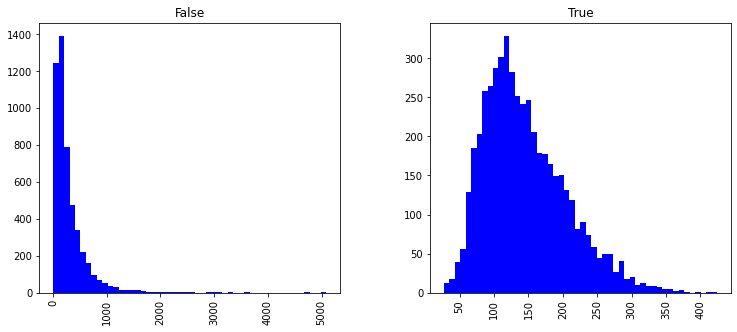

In [ ]:
data2['length'] = data2['reviewText'].apply(len)
data2.hist(column='length',by='llm',bins=50,color='blue',figsize=(12,5))
plt.show()

In [ ]:
'''data.groupby("llm").describe()'''

'data.groupby("llm").describe()'

In [ ]:
'''longreviews = data[data["length"] >= 5000]
longreviews.groupby("llm").describe()'''

'longreviews = data[data["length"] >= 5000]\nlongreviews.groupby("llm").describe()'

In [ ]:
'''data2.groupby("llm").describe()'''

'data2.groupby("llm").describe()'

In [ ]:
def process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
bow_transformer = CountVectorizer(analyzer=process)
bow_transformer

CountVectorizer(analyzer=<function process at 0x7f54be85ec10>)

In [ ]:
bow_transformer.fit(data2['reviewText'])
print("Vocabulary Size:",len(bow_transformer.vocabulary_))

Vocabulary Size: 17377


In [ ]:
data2.reset_index(drop=True, inplace=True)
data2.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm,fake,wasHelpful,totalReviews,helpRatio,length,fakeBoolean
0,201365,4dababae-1690-4b3a-94b8-0dc06932f7e8,24783dea-1634-4508-8407-5ff58f3bc997,KikiK,"[0, 0]",brush absolutely amazing super curly thick hai...,5.0,curly hair miracle brush,1.317082e-09,"09 27, 2011",True,0,0,0,0.0,140,False
1,202480,f1b3f8d1-1f3e-4954-9f6e-867d5d7c8a11,d3848f70-4d11-4c4c-abe4-9b18d8f71d07,PaintItPretty,"[0, 0]",great product works really well bought thin se...,4.5,low cost great results,1.316218e-09,"09 17, 2011",True,0,0,0,0.0,168,False
2,202807,1727604d-af0c-4d9f-969e-0463895dccec,fda058b9-ebe4-4eaf-94c0-fa3f62ca4f7f,Jenny,"[0, 0]",'m glad bought product 's easy use 's great qu...,4.0,great quality,1.389226e-09,"01 9, 2014",True,0,0,0,0.0,98,False
3,201630,9273a596-38a9-448f-8238-7c8549a5d8f4,53132c1c-ce80-435a-9020-adc50d373b25,Yara,"[0, 0]",'m glad bought brush 's great contouring brush...,5.0,soft easy use,1.385942e-09,"12 2, 2013",True,0,0,0,0.0,116,False
4,201235,28c18b07-2eb1-479a-ba67-60ba45e2745b,07bb6fc0-ba2c-4864-95cf-aa8850bc45e2,J.B,"[0, 0]",got daughter works great bit hesitant price wo...,4.0,works great great price,1.356998e-09,"01 1, 2013",True,0,0,0,0.0,104,False


In [ ]:
bow_reviews = bow_transformer.transform(data2['reviewText'])

In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.16


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_reviews = tfidf_transformer.transform(bow_reviews)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data2['reviewText'],data2['llm'],test_size=0.30)

In [ ]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=process)), ('tfidf',TfidfTransformer()), ('classifier',MultinomialNB())])
pipeline.fit(Xtrain,ytrain)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7f54be85ec10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
pred = pipeline.predict(Xtest)

In [ ]:
print(accuracy_score(ytest, pred))

0.91


In [ ]:
total = 0.907 + 0.723
bowmodelweight = 0.907/total
regressionweight = 0.723/total

In [ ]:
def falsePosAndNeg(pred, ytest):
  pred = list(pred)
  ytest = list(ytest)
  falsePositives = 0
  falseNegatives = 0
  for i in range(len(pred)):
    if pred[i] and not ytest[i]:
      falsePositives += 1
    elif ytest[i] and not pred[i]:
      falseNegatives += 1
  print("False Positives:", falsePositives)
  print("False Negatives:", falseNegatives)

In [ ]:
falsePosAndNeg(pred, ytest)

False Positives: 226
False Negatives: 44


In [ ]:
print('Confusion Matrix:\n',confusion_matrix(ytest,pred))


Confusion Matrix:
 [[1293  226]
 [  44 1437]]


#Text Model 2 - Predicting "Fake" Reviews

In [ ]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(data2['reviewText'],data2['fakeBoolean'],test_size=0.30)
pipeline2 = Pipeline([('bow',CountVectorizer(analyzer=process)), ('tfidf',TfidfTransformer()), ('classifier',MultinomialNB())])
pipeline2.fit(Xtrain2,ytrain2)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7f54be85ec10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
pred = pipeline2.predict(Xtest)
print(pred)


[False False False ... False False False]


In [ ]:
print(accuracy_score(ytest2, pred))

0.9606666666666667


In [ ]:
print('Confusion Matrix:\n',confusion_matrix(ytest2,pred))

Confusion Matrix:
 [[2882    0]
 [ 118    0]]


#Making Graphs and Charts

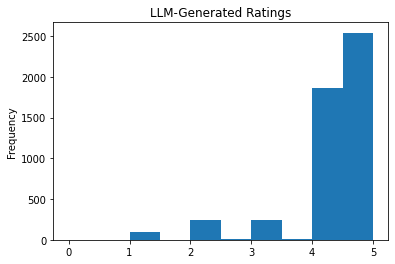

In [ ]:
plt = dfLLM["overall"].plot(kind='hist',title='LLM-Generated Ratings')

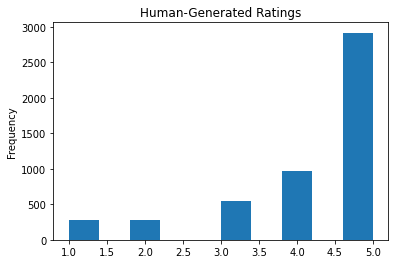

In [ ]:
plt = dfHUM["overall"].plot(kind='hist',title='Human-Generated Ratings')

TypeError: ignored

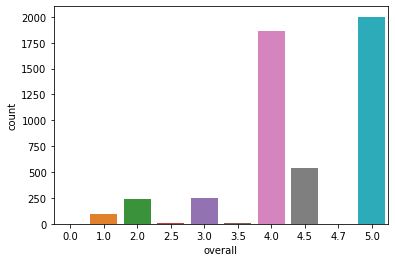

In [ ]:
sns.countplot(x="overall", data=dfLLM)
plt.title("Distribution of Review Ratings")
plt.show()

#Gradio

In [ ]:
MAX_SEQUENCE_LENGTH = 5000
MAX_NUM_WORDS = 25000
EMBEDDING_DIM = 300
TEST_SPLIT = 0.35

TEXT_DATA = 'amazon_reviews_updated.csv'

In [ ]:
# define a function that allows us to evaluate our models

from sklearn.metrics import accuracy_score

def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing errors are reported
    '''
    # training error
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing error
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    
    return train_acc, test_acc

In [ ]:
# estimate 95% confidence interval on error

# NOTE: based on conversation on stackexchange: 
# https://stats.stackexchange.com/questions/247551/how-to-determine-the-confidence-of-a-neural-network-prediction
# towards bottom of the page.

from math import sqrt

def error_conf(error, n):
    term = 1.96*sqrt((error*(1-error))/n)
    lb = error - term
    ub = error + term
    
    return lb, ub

In [ ]:
# read in our data and preprocess it
df = data2
df.reviewText=df.reviewText.astype(str)

In [ ]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

tokenizer.fit_on_texts(df["reviewText"])
sequences = tokenizer.texts_to_sequences(df["reviewText"])

word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
d = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')
labels = df['fakeBoolean']

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 14211 unique tokens.
Shape of data tensor: (10000, 17)
Shape of label tensor: (10000,)


In [ ]:
# split the data into a training set and a validation set   
from numpy import random
from sklearn.model_selection import train_test_split
random.shuffle(d)
x_train, x_val, y_train, y_val = train_test_split(d, 
                                                  labels, 
                                                  test_size=TEST_SPLIT)

In [ ]:
# build a 1D convnet with global maxpooling                                                                      

from keras import layers
from keras.models import Sequential

model = Sequential(
    [
        # part 1: word and sequence processing
        layers.Embedding(num_words,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=True),
        layers.Conv1D(128, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        
        # part 2: classification
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 300)         4263600   
                                                                 
 conv1d (Conv1D)             (None, 4996, 128)         192128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,472,369
Trainable params: 4,472,369
Non-trainable params: 0
______________________________________________

In [ ]:
  # train the model

history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(x_val, y_val))

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# evaluate model

train_acc, test_acc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_val, 
                                     y_val)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))

In [ ]:
# estimate 95% confidence interval

n = x_val.shape[0]
lb, ub = error_conf(1-test_acc, n)

print("95% confidence interval: {:.2f}%-{:.2f}%".format((1-ub)*100,(1-lb)*100))

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 K

In [ ]:
import gradio as gr

def greet(review):
  mydata = {
    'reviewText':[review, "a"],
    'llm' :[True, False],
  }
  df = pd.DataFrame(mydata)
  a,b,c,d = train_test_split(df['reviewText'],df['llm'],test_size=0.5)
  mypred = pipeline.predict(a)
  return "LLM-GENERATED" if mypred[0] else "HUMAN-GENERATED"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>